In [ ]:
from deepface import DeepFace

In [ ]:
hq_face_path= "../raw_hq_data/pilip_hq_1.jpg"
lq_face_path="../raw_lq_data/downscaled_img.jpg"
upscaled_face_path="../results/restored_faces/"

In [ ]:
result = DeepFace.verify(
  img1_path=hq_face_path, 
  img2_path=upscaled_face_path,
  model_name="ArcFace",
  detector_backend="retinaface",
  enforce_detection=False)

In [33]:
result

{'verified': True,
 'distance': 0.463857,
 'threshold': 0.68,
 'confidence': 65.08,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 323,
   'y': 284,
   'w': 828,
   'h': 1138,
   'left_eye': (916, 738),
   'right_eye': (527, 742),
   'nose': (709, 957),
   'mouth_left': (876, 1153),
   'mouth_right': (571, 1154)},
  'img2': {'x': 9,
   'y': 10,
   'w': 29,
   'h': 38,
   'left_eye': (31, 25),
   'right_eye': (17, 25),
   'nose': (24, 31),
   'mouth_left': (29, 38),
   'mouth_right': (18, 38)}},
 'time': 8.86}

## Visualisasi


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 # Pastikan library opencv-python sudah terinstal

def visualize_comparison(result, all_facial_areas, hq_img_path, lowres_img_path, upscaled_img_path):
    """
    Membuat visualisasi perbandingan 3 gambar: HQ, Low-Res, dan Upscaled.

    Args:
        result (dict): Dictionary output dari DeepFace.verify(hq_img, upscaled_img).
        all_facial_areas (dict): Dictionary berisi koordinat wajah untuk ketiga gambar.
                                 Contoh: {'hq': {'x':..}, 'lowres': {'x':..}, 'upscaled': {'x':..}}
        hq_img_path (str): Path ke gambar High Quality.
        lowres_img_path (str): Path ke gambar Low Resolution.
        upscaled_img_path (str): Path ke gambar hasil upscaling.
    """
    # Ekstrak informasi penting dari dictionary hasil verifikasi
    is_verified = result['verified']
    distance = result['distance']
    threshold = result['threshold']
    model_name = result['model']

    # Baca ketiga gambar dan konversi ke RGB
    img_hq = cv2.cvtColor(cv2.imread(hq_img_path), cv2.COLOR_BGR2RGB)
    img_lowres = cv2.cvtColor(cv2.imread(lowres_img_path), cv2.COLOR_BGR2RGB)
    img_upscaled = cv2.cvtColor(cv2.imread(upscaled_img_path), cv2.COLOR_BGR2RGB)

    # Buat plot dengan 3 subplot (1 baris, 3 kolom)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

    # --- Plot 1: Gambar HQ (Referensi) ---
    ax1.imshow(img_hq)
    ax1.set_title("1. Gambar HQ (Referensi)", fontsize=12)
    ax1.axis('off')

    # --- Plot 2: Gambar Low-Res (Input) ---
    ax2.imshow(img_lowres)
    ax2.set_title("2. Gambar Low-Res (Input)", fontsize=12)
    ax2.axis('off')

    # --- Plot 3: Gambar Upscaled (Hasil) ---
    ax3.imshow(img_upscaled)
    ax3.set_title("3. Gambar Upscaled (Hasil)", fontsize=12)
    ax3.axis('off')

    # Tentukan warna kotak berdasarkan hasil verifikasi (HQ vs Upscaled)
    verification_color = 'limegreen' if is_verified else 'red'
    
    # Gambar kotak di setiap wajah
    # Kotak untuk HQ
    if 'hq' in all_facial_areas:
        coords = all_facial_areas['hq']
        rect = patches.Rectangle((coords['x'], coords['y']), coords['w'], coords['h'], 
                                 linewidth=2, edgecolor=verification_color, facecolor='none')
        ax1.add_patch(rect)

    # Kotak untuk Low-Res (gunakan warna netral, misal biru)
    if 'lowres' in all_facial_areas:
        coords = all_facial_areas['lowres']
        rect = patches.Rectangle((coords['x'], coords['y']), coords['w'], coords['h'], 
                                 linewidth=2, edgecolor='deepskyblue', facecolor='none')
        ax2.add_patch(rect)
        
    # Kotak untuk Upscaled
    if 'upscaled' in all_facial_areas:
        coords = all_facial_areas['upscaled']
        rect = patches.Rectangle((coords['x'], coords['y']), coords['w'], coords['h'], 
                                 linewidth=2, edgecolor=verification_color, facecolor='none')
        ax3.add_patch(rect)

    # Tentukan teks dan warna untuk judul utama
    if is_verified:
        verification_text = "✅ TERVERIFIKASI (Gambar 1 & 3 Dianggap Orang yang Sama)"
        title_color = 'green'
    else:
        verification_text = "❌ TIDAK TERVERIFIKASI (Gambar 1 & 3 Dianggap Berbeda)"
        title_color = 'red'

    # Tambahkan judul utama yang menunjukkan hasil
    fig.suptitle(verification_text, fontsize=20, color=title_color, weight='bold')

    # Tambahkan detail hasil di bawah judul
    details_text = (
        f"Model Verifikasi: {model_name}\n"
        f"Jarak (Distance): {distance:.4f} (Batas kemiripan: {threshold})"
    )
    plt.figtext(0.5, 0.90, details_text, ha="center", fontsize=11, bbox={"facecolor":"white", "alpha":0.6, "pad":5})

    plt.tight_layout(rect=[0, 0, 1, 0.88])
    plt.show()

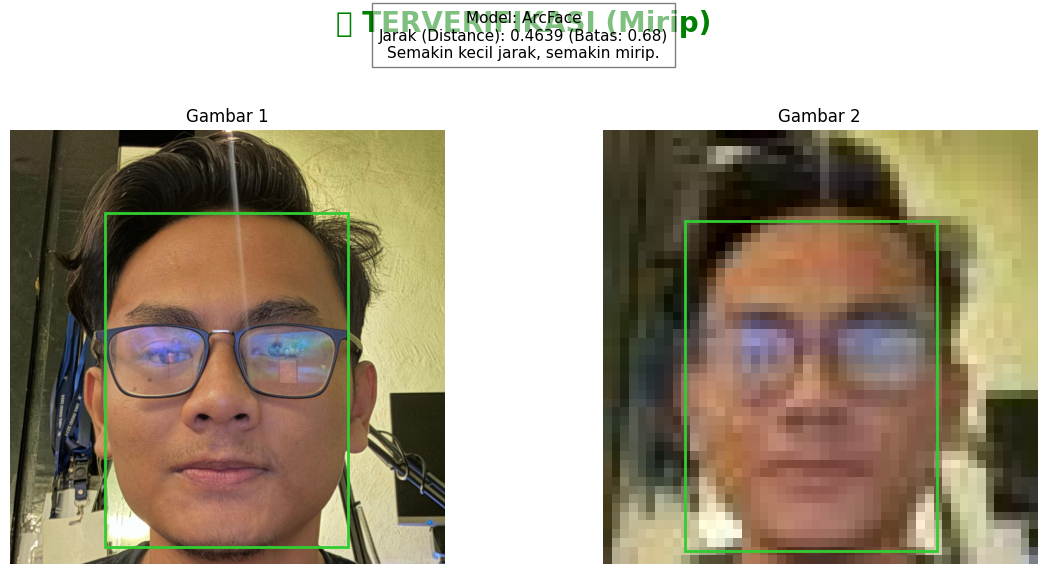

In [35]:
try:
    visualize_verification(result, img1_path, img2_path)
except FileNotFoundError:
    print(f"Error: Salah satu atau kedua file gambar tidak ditemukan.")
    print(f"Path 1: {img1_path}")
    print(f"Path 2: {img2_path}")
    print("Mohon periksa kembali path file Anda.")